<a href="https://colab.research.google.com/github/OlhaZahrebelna/my_practis_on_github/blob/main/Zahrebelna_Olha_%22hw_4_4_%D0%92%D1%96%D0%B7%D1%83%D0%B0%D0%BB%D1%96%D0%B7%D0%B0%D1%86%D1%96%D1%8F_%D0%B7_pandas_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

У цьому домашньому завданні ми продовжуємо працювати з набором даних `Yulu`, з яким почали працювати в "hw 4.3. Робота з DataFrame. Діаграма розсіювання.". Фокус цього ДЗ в тому, аби будувати візуалізації використовуючи методи pandas.DataFrame. Це дозволяє будувати візуалізації ще швидше.

Документація до тої частини бібліотеки, з якою тут працюємо

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html

### Профіль колонок набору даних:

- **datetime**: дата та час зібрані погодинно
- **season**: сезон (1: весна, 2: літо, 3: осінь, 4: зима)
- **holiday**: чи є день святковим (витягнуто з http://dchr.dc.gov/page/holiday-schedule)
- **workingday**: якщо день не є вихідним або святковим, то позначається як 1, в іншому випадку – 0.
- **weather**:
  1. Ясно, Мало хмарно, частково хмарно
  2. Туман + Хмарно, Туман + Розірвані хмари, Туман + Мало хмарно, Туман
  3. Легкий сніг, Легкий дощ + Гроза + Розсіяні хмари, Легкий дощ + Розсіяні хмари
  4. Сильний дощ + Крижані кулі + Гроза + Туман, Сніг + Туман
- **temp**: температура в градусах Цельсія
- **atemp**: як відчувається температура в градусах Цельсія
- **humidity**: вологість
- **windspeed**: швидкість вітру
- **casual**: кількість неформальних користувачів
- **registered**: кількість зареєстрованих користувачів
- **count**: загальна кількість велосипедів, взятих в оренду, включаючи неформальних та зареєстрованих користувачів

0. Імпортуйте бібліотеки `matplotlib.pyplot` та `pandas`.  Завантажте дані з файла yulu_rental.csv у pandas.DataFrame df.

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
path_to_file = 'yulu_rental.csv'
df = pd.read_csv(path_to_file)

1.1. Користуючись групою методів `pandas.plot` побудуйте гістограму кількості зареєстрованих користувачів з налаштуваннями за замовченням (тобто без жодних додаткових параметрів).

In [3]:
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

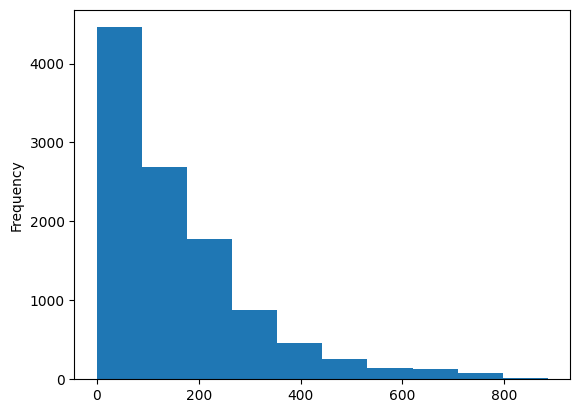

In [4]:
df['registered'].plot.hist();

1.2. Побудуйте гістограму для цього ж показника, але задайте кількість бінів рівну 30 і задайте прозорість 0.5. Додайте підписи за осями ОХ і ОУ, а також назву дівграмі. Опишіть свої спостереження. Що бачите? Чому дані можуть мати такий розподіл?

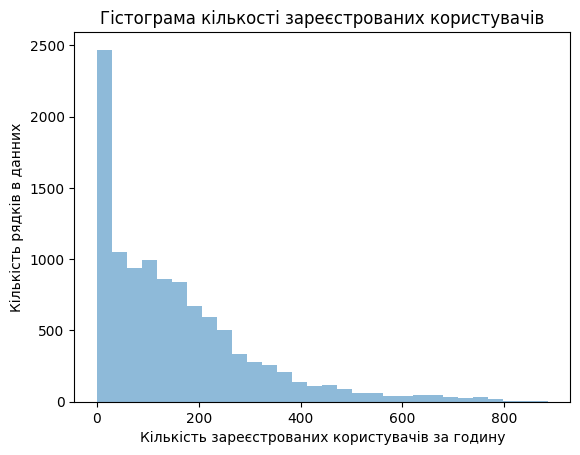

In [6]:
df['registered'].plot.hist(bins=30, alpha=0.5)
plt.xlabel('Кількість зареєстрованих користувачів за годину')
plt.ylabel('Кількість рядків в данних')
plt.title('Гістограма кількості зареєстрованих користувачів');

Має вийти щось таке (може бути без сітки):

![](https://drive.google.com/uc?export=view&id=1Pb3UD8cmg_V0LLf8A4feOepTDXMqEAf8)


--------

Перетворимо колонку `datetime` на тип даних `pd.datetime` - це нам доопоможе в подальшій роботі. Просто запустіть колонку нижче і занатуйте собі цей метод роботи з колонкою, в якій міститься дата і час.

In [7]:
df['datetime'] = pd.to_datetime(df.datetime)

І створимо нову колонку `dayofweek` для того, аби дослідити детальніше, коли у нас немає поїздок.

In [8]:
df['dayofweek'] = df.datetime.dt.day_of_week

Переглянемо значення в колонкці. Колонка dayofweek містить числа від 0 до 6 включно, де 0 відповідає понеділку.

In [9]:
df[['datetime','dayofweek']][df.dayofweek==0].head()

,datetime,dayofweek
47,2011-01-03 00:00:00,0
48,2011-01-03 01:00:00,0
49,2011-01-03 04:00:00,0
50,2011-01-03 05:00:00,0
51,2011-01-03 06:00:00,0


2. Проведемо аналіз нульової активності зареєстрованих користувачів за днями тижня. Для цього
  1. Виберіть з набору даних усі записи, де кількість зареєстрованих користувачів дорівнює 0. Групуйте ці записи за днями тижня (`dayofweek`) та обчисліть кількість нульових записів для кожного дня.
  2. Після групування, використайте графік типу "bar" для візуалізації результатів. Кожна смужка на графіку має відображати кількість записів у даних для цього дня тижня, коли не було зареєстровано жодної поїздки користувачами.

In [12]:
df_zero_registered = df[df['registered']==0]
len(df_zero_registered)

15

In [15]:
df_zero_regist_dayofweek = df_zero_registered.groupby('dayofweek')['registered'].count()

In [16]:
df_zero_regist_dayofweek

,registered
dayofweek,
0,5
1,3
2,2
3,1
4,1
5,1
6,2


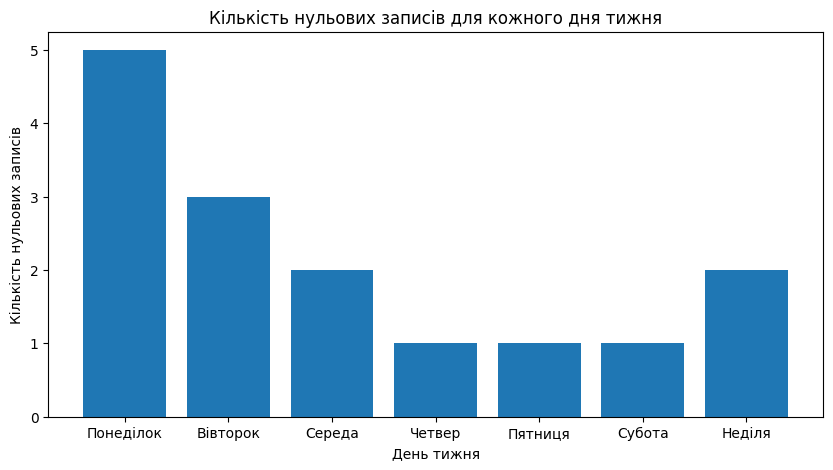

In [18]:
fig = plt.figure(figsize=(10,5))
plt.bar(df_zero_regist_dayofweek.index, df_zero_regist_dayofweek.values)
plt.xticks(df_zero_regist_dayofweek.index, ['Понеділок', 'Вівторок', 'Середа', 'Четвер', 'Пятниця', 'Субота', 'Неділя'])
plt.xlabel('День тижня')
plt.ylabel('Кількість нульових записів')
plt.title('Кількість нульових записів для кожного дня тижня');

Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1FXNzMa7rTdBQDwXSQfPTtPX5CHZK9A4X)

3. Проведемо аналіз загальної кількості зареєстрованих покристувачів за різними погодними умовами.
Згрупуйте всі дані за погодними умовами і визначте суму кількості зареєстрованих користувачів для кожної погодньої умови.
Побудуйте стовпачасту діаграму, які відобразить результат обчислень.
Зверніться до опису даних та дайте відповідь: чи побудована візуалізація має логічний сенс з точки зору опису даних.

In [20]:
depend_weather_reg_df = df.groupby('weather')['registered'].sum()

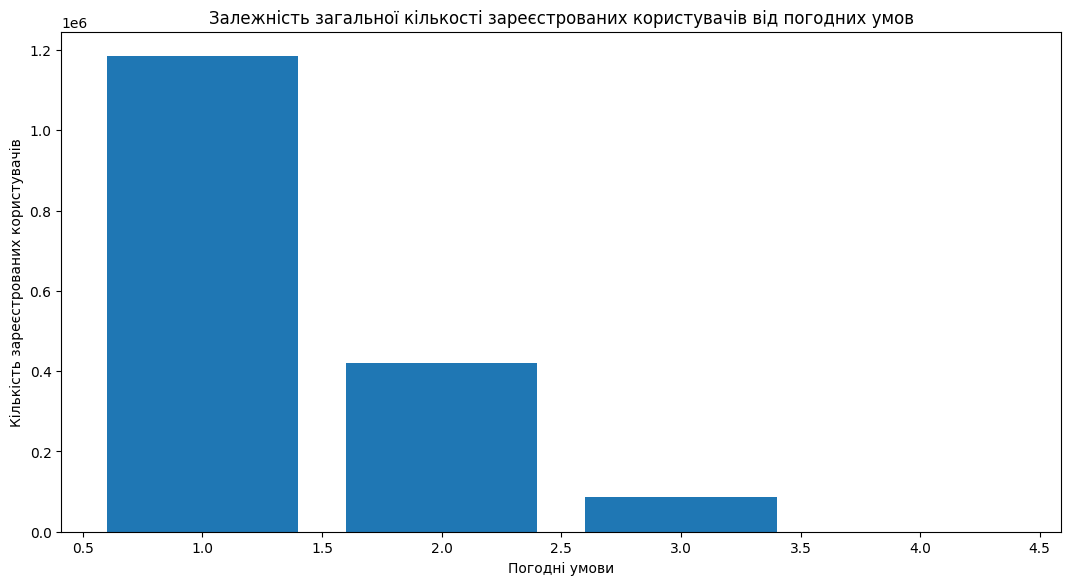

In [50]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_axes([0,0,1,1])
ax.bar(depend_weather_reg_df.index, depend_weather_reg_df.values)

plt.xlabel('Погодні умови')
plt.ylabel('Кількість зареєстрованих користувачів')
plt.title('Залежність загальної кількості зареєстрованих користувачів від погодних умов')
plt.show()

Так, побудована візуалізація має логічний сенс. Ми можемо спостерігати, що найбільша кількість зареєстрованих користувачів відбувається за гарних погодних умов, таких як ясна або хмарна погода з незначною хмарністю. Це пояснюється тим, що люди зазвичай активніше пересуваються та більше часу проводять на вулиці під час комфортних погодних умов. Кількість реєстрацій починає спадати в міру погіршення погоди — коли починається дощ, туман, сніг або гроза, що може зменшувати бажання людей виходити на вулицю або користуватися послугами на відкритому повітрі.

Аналіз даних показує, що за гарної погоди кількість користувачів або покупців зростає, можна припустити, що дохід у такі дні також буде вищим. Навпаки, погіршення погодних умов може зменшувати потік клієнтів, а отже й дохід.

На основі цього можна розробляти стратегії для збільшення продажів у залежності від погоди, наприклад, пропонувати спеціальні акції в дні, коли очікується погана погода, або оптимізувати ресурси в дні з нижчим потоком клієнтів.

4. Користуючись групою методів pandas.plot побудуйте діаграму розсіювання (scatter plot) між вологістю і кількістю зареєстрованих користувачів. Встановіть прозорість на 0.5, а також налаштуйте діаграму так, аби колір кожної точки відповідав значенню температури за відчуттями (`atemp`).

Проаналізуйте графік, що спостерігаєте?

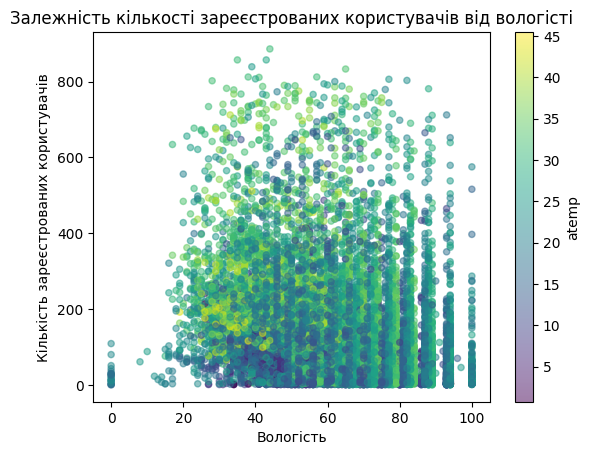

In [47]:
df.plot.scatter(x='humidity',y='registered', alpha=0.5, c='atemp',cmap='viridis')
plt.xlabel('Вологість')
plt.ylabel('Кількість зареєстрованих користувачів')
plt.title('Залежність кількості зареєстрованих користувачів від вологісті')
plt.show();


Ми спостерігаємо високу щільність точок у діапазоні вологості від 30 до 80 та кількості зареєстрованих користувачів від 0 до 380. Графік показує нелінійний зв'язок між вологістю і кількістю зареєстрованих користувачів. Також ми помічаємо аномалії, зокрема викиди при вологості 0, що, ймовірно, є результатом помилок у введенні даних.

Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1trepX8z23YwyP9P8cAko9IzwOZkvLo8y)